<a href="https://colab.research.google.com/github/PonEzhilSelvan/ann/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
dataset.head(5)
copy_dataset = dataset.copy()
#since rownumber, customer id, Surname are  not usefull data (unique data we remove  the data.

In [5]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13:]

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## Concatenate the Data Frames

X = pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [16]:
from os import EX_PROTOCOL
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,  epochs = 100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6511 - loss: 0.6893 - val_accuracy: 0.7679 - val_loss: 0.5227
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7920 - loss: 0.4823 - val_accuracy: 0.7883 - val_loss: 0.4802
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7925 - loss: 0.4715 - val_accuracy: 0.7925 - val_loss: 0.4657
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7920 - loss: 0.4595 - val_accuracy: 0.7936 - val_loss: 0.4569
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8038 - loss: 0.4361 - val_accuracy: 0.7955 - val_loss: 0.4503
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8078 - loss: 0.4281 - val_accuracy: 0.7978 - val_loss: 0.4452
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8083 - loss: 0.4233 - val_accuracy: 0.7982 - val_loss: 0.4410
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8058 - loss: 0.4271 - val_accuracy: 0.7989

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


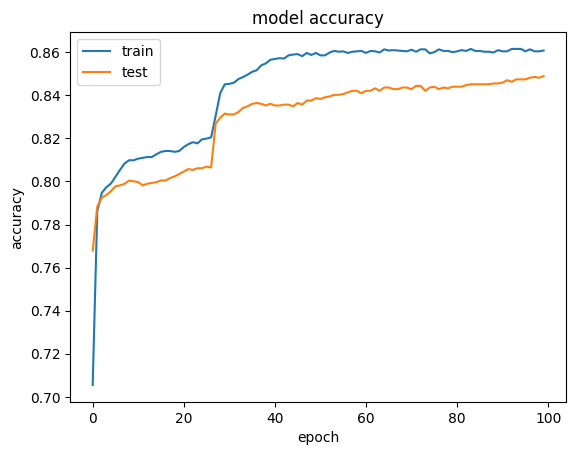

In [19]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

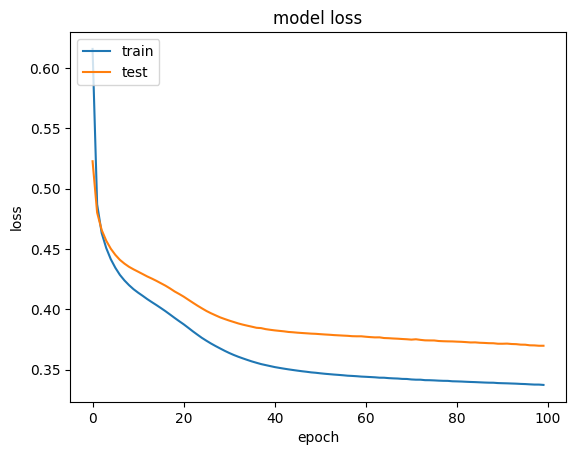

In [20]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.2668241 ],
       [0.38308042],
       [0.14566453],
       ...,
       [0.2446066 ],
       [0.20985158],
       [0.15652576]], dtype=float32)

In [23]:
y_pred = (y_pred > 0.5)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [26]:
score

0.8575